# Lab 1: Introduction to Python and Jupyter Notebooks with Python Kernel

Python is an incredibly flexible programming language. It is an interpreted language, and is easy to write and debug. Moreover, hundreds of libraries are available to suit all your needs.

In this lab we will introduce the Python programming language, as well as two important libraries we will use throughout the unit:
- [NumPy](http://docs.scipy.org/doc/numpy/index.html), for scientific computation
- [Matplotlib](http://matplotlib.org/contents.html), to plot any kind of data


Both of the above libraries have a complete and very good documentation which can be used to learn other features of the libraries or for questions and examples. The documentation is available either online (links above) or via Python itself, e.g. `help(numpy.array)` in the Python interpreter.


### The Python programming language

The basics of Python are available [here](https://learnxinyminutes.com/docs/python/).

The three key concepts worth mentioning here are:
- loose syntax: no need of semicolon to end a line (e.g. `;` in C)
- importance of code **indentation**: `if`, `for`, and most statement blocks are identified by indentation (this replaces the curly braces `{` in other languages)
- comments are introduced with `#`

The classic way to launch Python programs is from the command line. Suppose we have the following `hello_world.py` file:

``` Python
a = 2
b = 2
c = a + b

message = 'Hello World! Did you know that {} + {} equals {}?'.format(a, b, c)

print(message)
```

`format` is a function of the `string` class. It works by substituting the placeholders `{}` contained in the string with the provided parameters, returning a new string. Notice how we do not have to specify the type of the variables we want to print, unlike the classic C-style `sprintf` methods available in many languages. The `format` function is very powerful and flexible, allowing complex output prints. You can find a nice  tutorial [here](https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3).

Now, if we type `python hello_world.py` in a shell (provided it is already installed, which is the case of most if not all Linux distributions), we should see the expected greeting message:

``` Bash
$ python hello_world.py 
Hello World! Did you know that 2 + 2 equals 4?
$
```

Python can also run interactively (somewhat like MATLAB). Simply type `python` in a shell and try it out! Alternatively, a better interactive Python shell (with tab completion, plus other features) is provided by [IPython](http://ipython.org/). To use IPython, simply type `ipython` in your shell to launch an interactive python session.


#### Python 3

We strongly encourage you to use Python 3 as opposed to Python 2, which will reach its end of life by the end of 2019.


### Jupyter Notebook

Python can be run on [Jupyter Notebook](http://jupyter.org/) too.

Jupyter Notebook is a computing environment supporting various programing languages (Python, R, Lua, etc.) through the concept of kernels.  
It allows you to enrich your code with complex comments formatted in Markdown and $\LaTeX$, as well as to place the results of your computation right below your code. Beside, it has all the features provided by the ipython interpreter, like tab auto-completion. 

Jupyter Notebook runs as a web server. To run this lab sheet navigate to the folder containing the file `labsheet1.ipynb` and run Jupyter:

``` Bash
cd Downloads
/opt/anaconda3-4.4.0/bin/jupyter notebook
```
Jupyter should automatically open a webpage.  If not, open your favourite web browser and go to: [localhost:8888/notebooks](http://localhost:8888/notebooks). Select `labsheet1.ipynb` from the file tree by clicking it. To shut down the notebook simply close your browser window and in the terminal window running the backend press `<Ctrl-C>`, type `y`, and press `Return` key.

Notebooks are organised in **cells**. A cell may contain either code (in our case, this will be Python code) or text, which can be easily and nicely formatted using the Markdown notation. 

To edit an already existing cell simply double-click on it. You can use the toolbar to insert new cells, edit and delete them. 

Cells can be run, by hitting `ctrl+enter` when editing a cell or by clicking on the `Run` button at the top. Running a Markdown cell will simply display the formatted text, while running a code cell will execute the commands executed in it. 

**Note**: when you run a code cell, all the created variables, implemented functions and imported libraries will be then available to every other code cell. However, it is commonly assumed that cells will be run sequentially in terms of prerequisites.


#### Markdown language (and a bit of $\LaTeX$ and HTML)
Markdown cells allow you to write fancy and simple comments: all of this is written in Markdown - double click on this cell to see the source. Introduction to Markdown syntax can be found [here](https://daringfireball.net/projects/markdown/syntax).

As Markdown is translated to HTML upon displaying it also allows you to use pure HTML: more details are available [here](https://daringfireball.net/projects/markdown/syntax#html).

Finally, you can also display simple $\LaTeX$ equations in Markdown thanks to `MathJax` support.  
For inline equations wrap your equation between `$` symbols; for display mode equations use `$$`.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importing the libraries

Before we start this lab we need to import the aforementioned NumPy and Matplotlib libraries, which we can do with the following code:

``` Python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
```
we use the `import` keyword and bind the libraries to the `np`, `plt` and `Axes3D` namespaces with the `as` keyword.

Now instead of typing long commands like:

``` Python
a = numpy.array([[1,2], [3,4]])
```

we can do:

``` Python
a = np.array([[1,2], [3,4]])
```

The cell below also instructs the Python kernel to put all the plots below your code (`%matplotlib inline`) and sets some default parameters for the plots (`pylab`) to ensure better readability when using a jupyter notebook. This line isn't used for python scripts.  

**Note** that up until now all the cells encountered in this notebook are *markdown* cells. The cell below is the first *code* cell in our notebook.

To import these packages into your workspace and set the plotting environment simply navigate to the cell bellow and **evaluate it** (see above for details).

**Note** The number will increase and denotes the order of execution of each cell.

In [2]:
import numpy as np
from scipy import stats
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

#### Pretty printing 

If you find yourself in a situation where printing some variables gives you barely readable output, e.g.:
``` Python
print([list(range(30)), [4,5,6], list(range(17))])
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
```
you can import the `pprint` - *Pretty Printing* function:

``` Python
from pprint import pprint
pprint([list(range(30)), [4,5,6], list(range(17))])
[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [4, 5, 6],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
```
which can give you a better insight into your data.

### Python as simple calculator 

Let's do some programming now: open the Python (or IPython) interpreter by typing `python` (or `ipython`) in the command line and perform some simple calculations, e.g.:

- `2 + 2`
- `7 * 7`
- `2 ** 10` (exponentiation)
- `10 / 3`
- `10 / 3.0`

please consider the difference between the output of the last two commands. Are you running python 2 or 3?


## NumPy 

NumPy is designed for scientific computing. The similarities to MATLAB are described [here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html).

NumPy defines its own multidimensional array which can be created with:

``` Python
np.array([[1, 2], [3, 4], [5, 6]])
```

- There is an alternative method that uses a MATLAB style syntax, `np.matrix`, __DO NOT USE THIS__. Use `np.array` instead.
- For more details, type `help(np.array)` in your Python console or visit online help [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html). 

As Python is an object oriented language, the difference between *function* and *object property* should be understood.  
An object instance, e.g. NumPy array `A = np.array([[1, 2], [3, 4], [5, 6]])` inherits all the functions from the class `numpy.array`. Therefore, to sum all elements of array `A` we can choose two approaches:

- `A.sum()`, or
- `np.sum(A)`.

the first one is advisable.

Moreover, some objects have *properties* (e.g. size or shape of an array). Instead of calling the size *function*, an array object has the size *property*, i.e.:

- `A.shape`
- `np.shape(A)`

the first one is advisable.

**Note: MATLAB and NumPy indices**  

Be careful with your indices!
- in Python, indices start from `0`, like in any proper programming language
- in MATLAB, they start from `1` (and rest assured, you'll hate this)


## Matplotlib 

Once your results are ready, a good way to interpret them is via *visualisation*: Matplotlib (in particular its `pyplot` module) is your friend here.  
For an overview of the kind of plots you can produce with it, have a look at [this](http://matplotlib.org/users/pyplot_tutorial.html) web page.

**Note: there are two plotting approaches**:

- via `plt` call  

``` Python
plt.scatter(x, y)
plt.show()
```
- via object creation

``` Python
fig, ax = plt.subplots() # when called with no arguments will create only one plot
ax.scatter(x, y)
plt.show()
```

both are equivalent, the second one is advisable when a finer control over the Matplolib's [axes class](https://matplotlib.org/api/axes_api.html) is needed.

## Let's start

Let's play a little bit with NumPy and Matplotlib now.

### 1. Create an array

Let's create two arrays, `A` and `B`:

``` Python
A = np.array([[2,3], [4,-1], [5,6]])
B = np.array([[5, 2], [8, 9], [2, 1]])
```


Try now to do it yourself in the *code* cell below. Print the content and the shape of the two matrices after you've created them.

**Note**: remember to __run__ the cell, as you'll need the variables `A` and `B` later!

In [4]:
# write here your code
A = np.array([[2,3], [4,-1], [5,6]])
B = np.array([[5, 2], [8, 9], [2, 1]])

print('Array A with shape {}:'.format(A.shape))
print(A)
print('Array B with shape {}:'.format(B.shape))
print(B)

# print(A)
# print("A has shape of: ", A.shape)
# print(B)
# print("B has shape of: ", B.shape)

Array A with shape (3, 2):
[[ 2  3]
 [ 4 -1]
 [ 5  6]]
Array B with shape (3, 2):
[[5 2]
 [8 9]
 [2 1]]


### 2. Array operations 

Once you've run the cell above, you should have arrays `A` and `B` loaded in memory.

Perform now the following operations on these matrices:

- $C = 3A$
- $C = A + B$
- $C = AB^T$

For more details type `help(np.transpose)` in your Python console or visit online help [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

In [5]:
# write here the code to perform the above operations, and print your results
C1 = 3 * A
print("C = 3A")
print(C1)

C2 = A + B
print("C = A + B")
print(C2)

# C3 = np.dot(A, np.transpose(B))
C3 = np.matmul(A, B.T)
print("C = AB^T")
print(C3)

C = 3A
[[ 6  9]
 [12 -3]
 [15 18]]
C = A + B
[[ 7  5]
 [12  8]
 [ 7  7]]
C = AB^T
[[16 43  7]
 [18 23  7]
 [37 94 16]]


### 3. More array operations

Calculate now the *mean*, *sum*, and *variance* of your matrices `A` and `B`, using `NumPy` functions/array properties `mean`, `sum`, `var`.

Hint: `help(np.sum)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html).  
Hint: `help(np.mean)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).  
Hint: `help(np.var)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html#numpy.var).

In [7]:
# write your code here
print("A is\n",A)
print("B is\n",B)
print()
print("Sum of A:",A.sum())
print("Sum of B:",np.sum(B))
print("Mean of A:",A.mean())
print("Mean of B:",np.mean(B))
print("Var of A:",A.var())
print("Var of B:",np.var(B))

A is
 [[ 2  3]
 [ 4 -1]
 [ 5  6]]
B is
 [[5 2]
 [8 9]
 [2 1]]

Sum of A: 19
Sum of B: 27
Mean of A: 3.1666666666666665
Mean of B: 4.5
Var of A: 5.138888888888888
Var of B: 9.583333333333334


### 4. Loading data

Load the file `data.dat` available on the lab's webpage into an array `D`.
Check the dimensions of the loaded data.

Tip: to load MATLAB files with NumPy pass the `delimiter=','` parameter to the appropriate `NumPy` method.

Hint: `help(np.loadtxt)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).  
Hint: `help(np.ndarray.shape)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html).

In [8]:
# write your code here

##CORRECT ANSWER##

# `delimiter=','` is necessary for loading MATLAB files
D = np.loadtxt('data.dat', delimiter=',')

Dsize_prop = D.shape # via property of element
Dsize_func = np.shape(D) # via NumPy function

print('D size: ', Dsize_prop)
print('D size: ', Dsize_func)

##CORRECT ANSWER##

D size:  (1000, 4)
D size:  (1000, 4)


### 5. Scatter plot

Plot the first two columns of the array `D` as *2D* scatter plot, then plot the last three columns as a *3D* scatter plot. 

Study the axis properties of the figure, and learn how to:

- label the axes
- change the axes limits
- add a grid to the plot
- change the markers’ shape, size and colour

Tip: For 3D plots use *3D projection*: `fig, ax = plt.subplots(subplot_kw={'projection' : '3d'})
`.  
Tip: Marker style object documentation is available [here](http://matplotlib.org/1.4.0/api/markers_api.html).

Hint: `help(plt.scatter)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter).  
Hint: `help(plt.show)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=show#matplotlib.pyplot.show).  
Hint: `help(plt.figure)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.figure).  
Hint: `help(plt.subplots)` or look [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html).  
Hint: `help(plt.Axes.set_xlabel)` or look [here](http://matplotlib.org/api/axes_api.html?highlight=set_xlabel#matplotlib.axes.Axes.set_xlabel).  
etc.

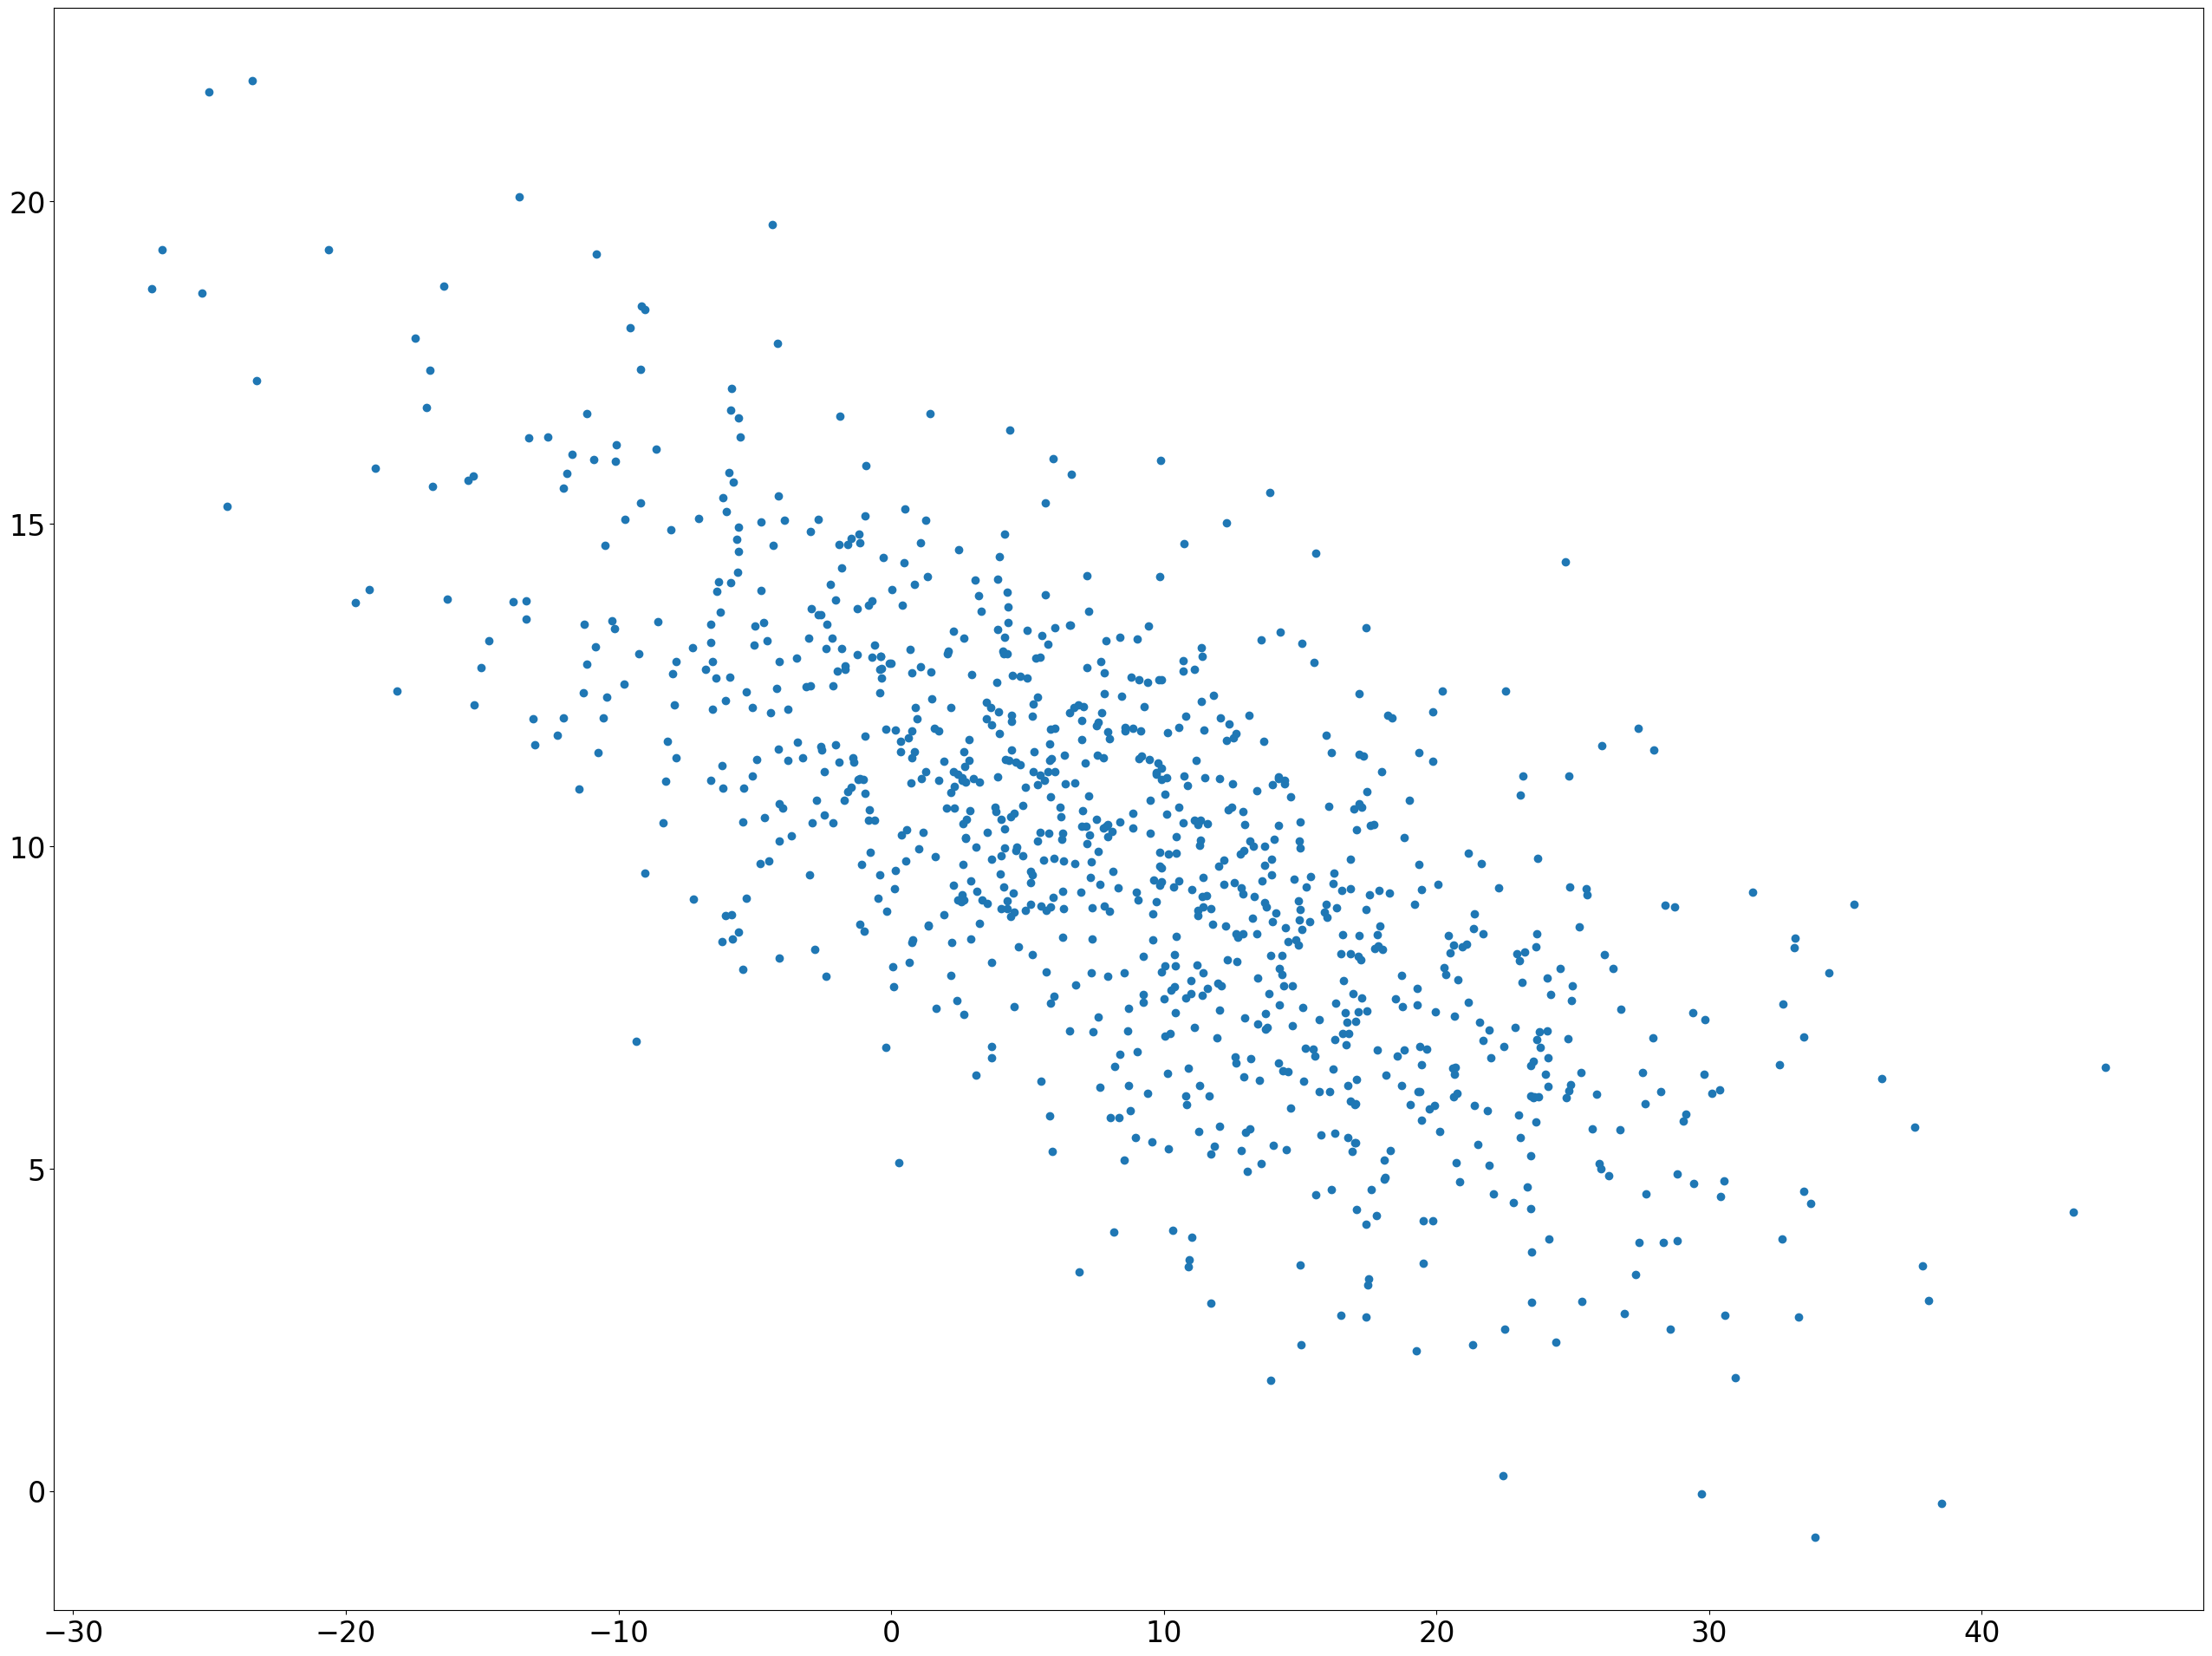

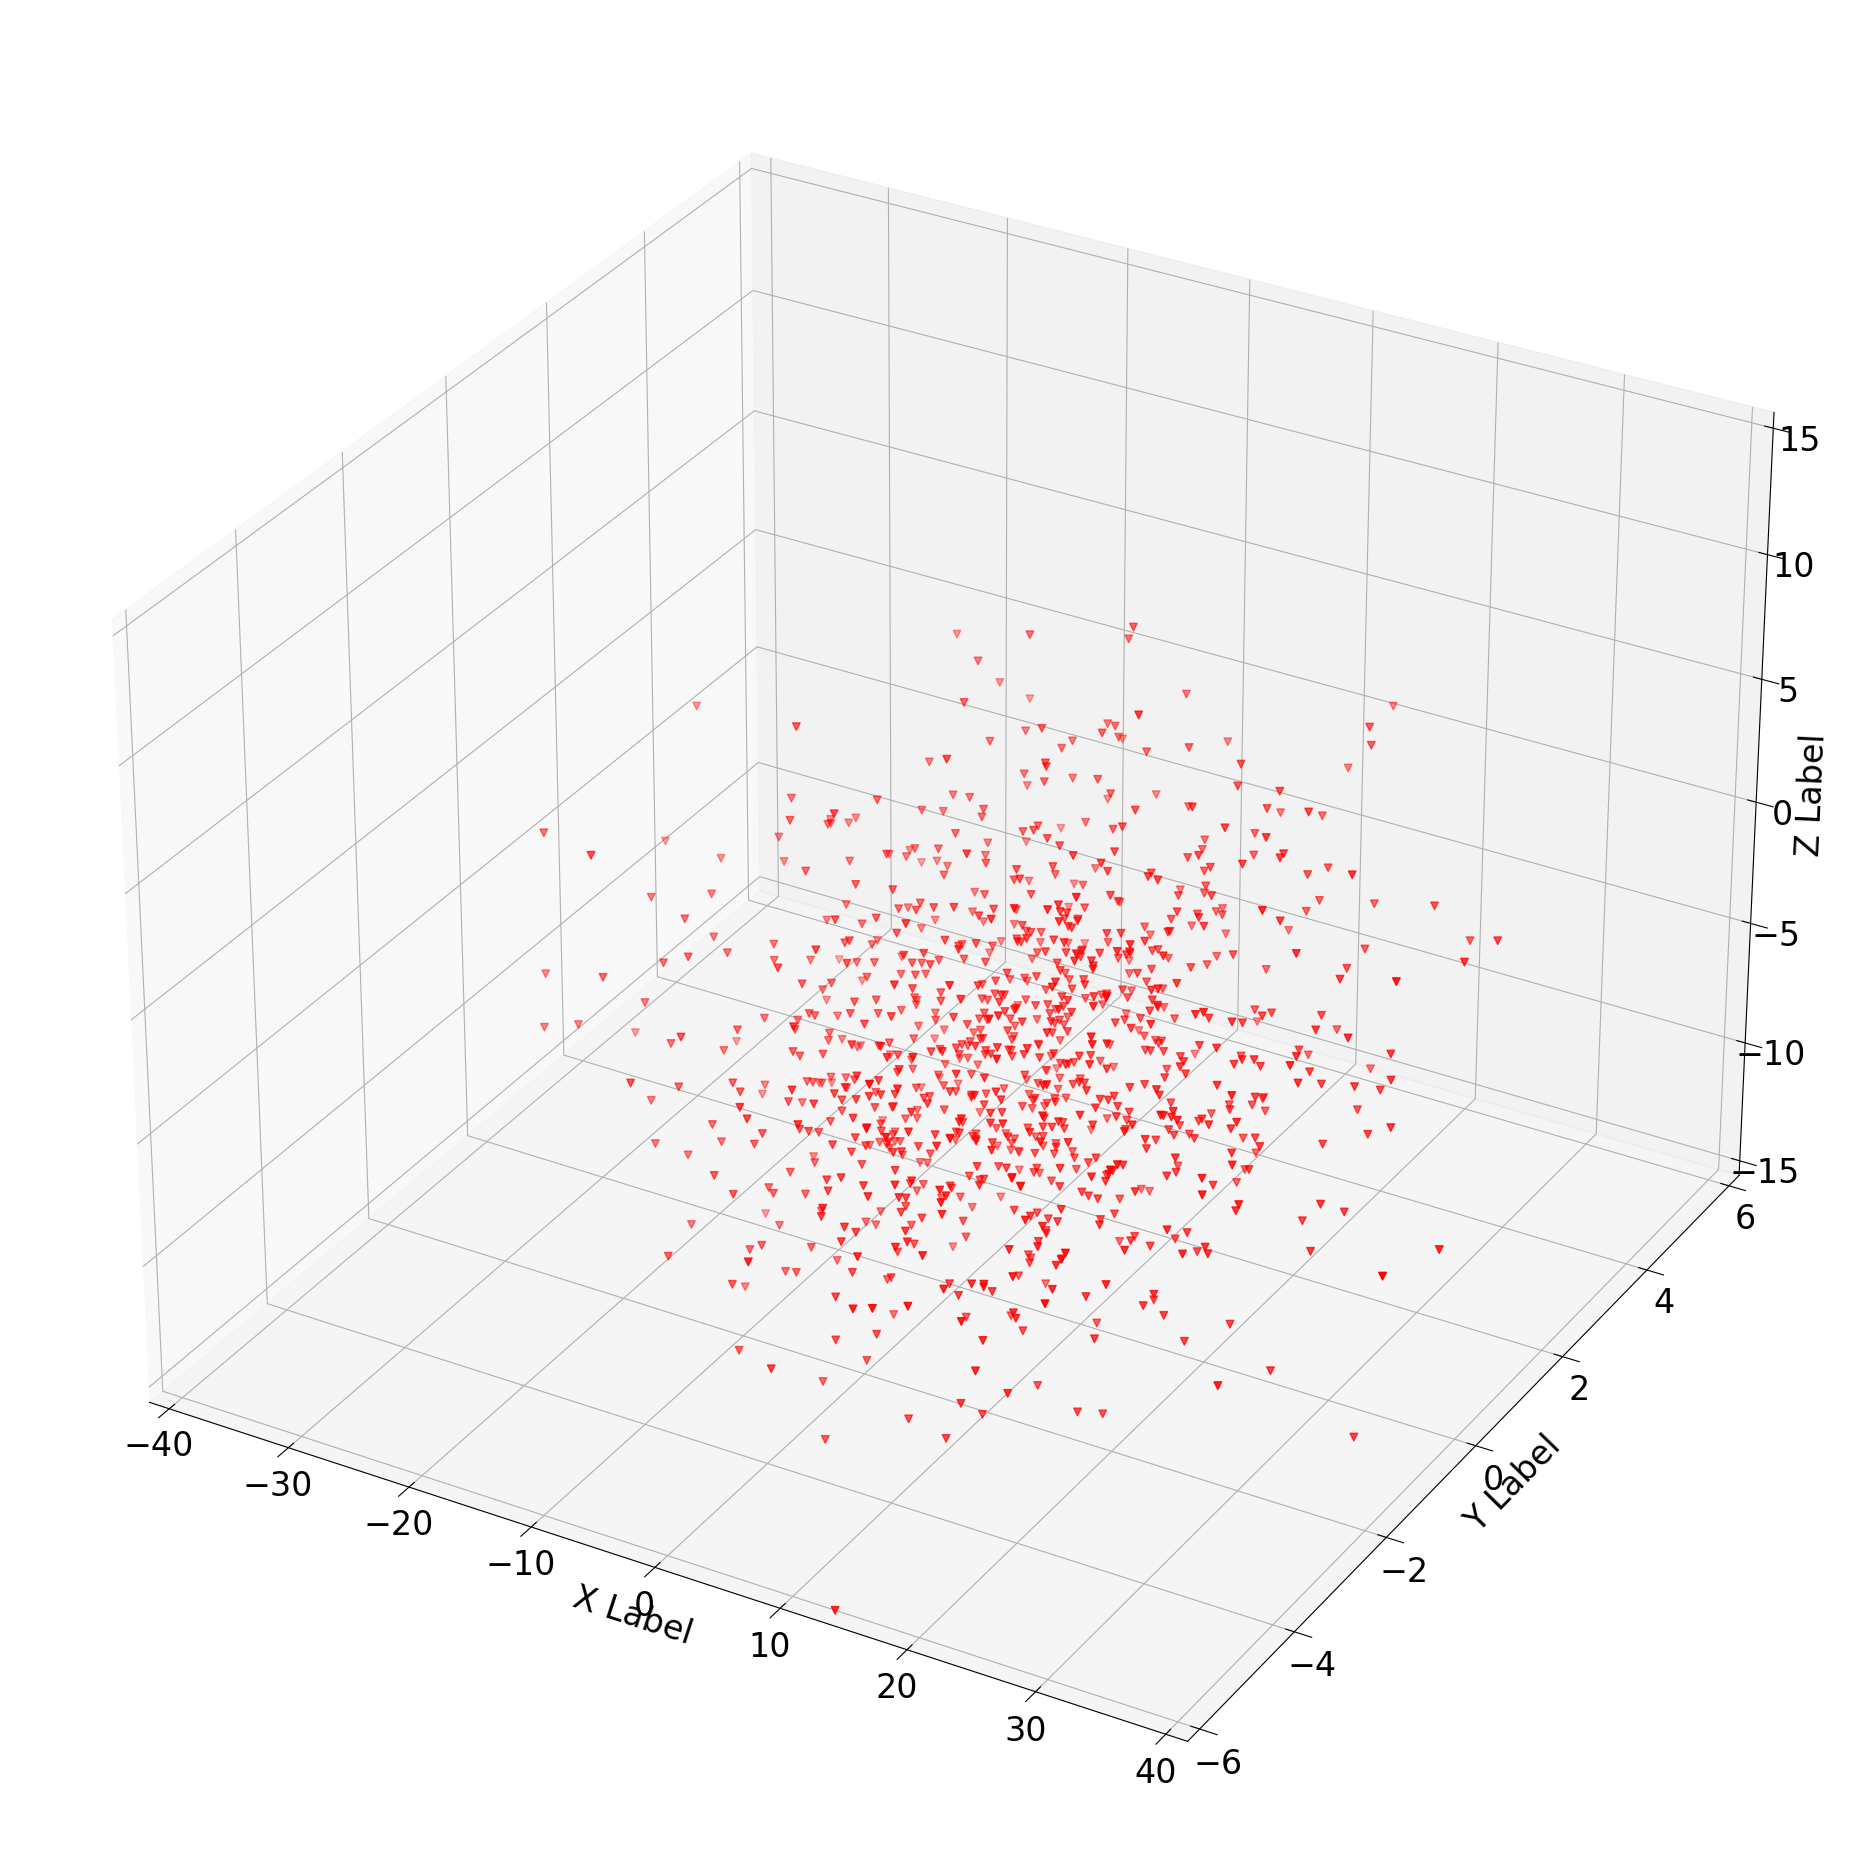

In [10]:
# write your code here

# # 2D Scatter Plot
# plt.figure(figsize=(8, 6))
# plt.scatter(D[:, 0], D[:, 1], c='blue', s=50, marker='o', label='2D Points')
# plt.xlabel("x-axis")
# plt.ylabel("y-axis")
# plt.title("2D Scatter Plot")
# plt.xlim(-10, 30)
# plt.ylim(-40, 60)
# plt.grid(True)
# plt.legend()
# plt.show()

# # 3D Scatter Plot
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 8))
# ax.scatter(D[:, -3], D[:, -2], D[:, -1], c='red', s=30, marker='^', label='3D Points')
# ax.set_xlabel("x-axis")
# ax.set_ylabel("y-axis")
# ax.set_zlabel("z-axis")
# ax.set_title("3D Scatter Plot")
# ax.set_xlim(-10, 30)
# ax.set_ylim(-40, 60)
# ax.set_zlim(-10, 10)
# ax.grid(True)
# ax.legend()
# plt.show()


## CORRECT ANSWER ##
fig0, ax0 = plt.subplots()
ax0.scatter(D[:,1], D[:,0])
plt.show()

# with defining custom figure
fig, ax = plt.subplots(subplot_kw={'projection' : '3d'})
ax.scatter(D[:,-3], D[:,-2], D[:,-1], marker='v', color='r', s=30 )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim([-40, +40])
ax.set_ylim([-6, +6])
ax.set_zlim([-15, +15])

ax.grid(True) # False

plt.show()

### 6. Histogram

Compute and display the histogram of the values in the first column of your array.

Tip: the histogram method returns some useful statistics.

Hint: `help(plt.hist)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist).

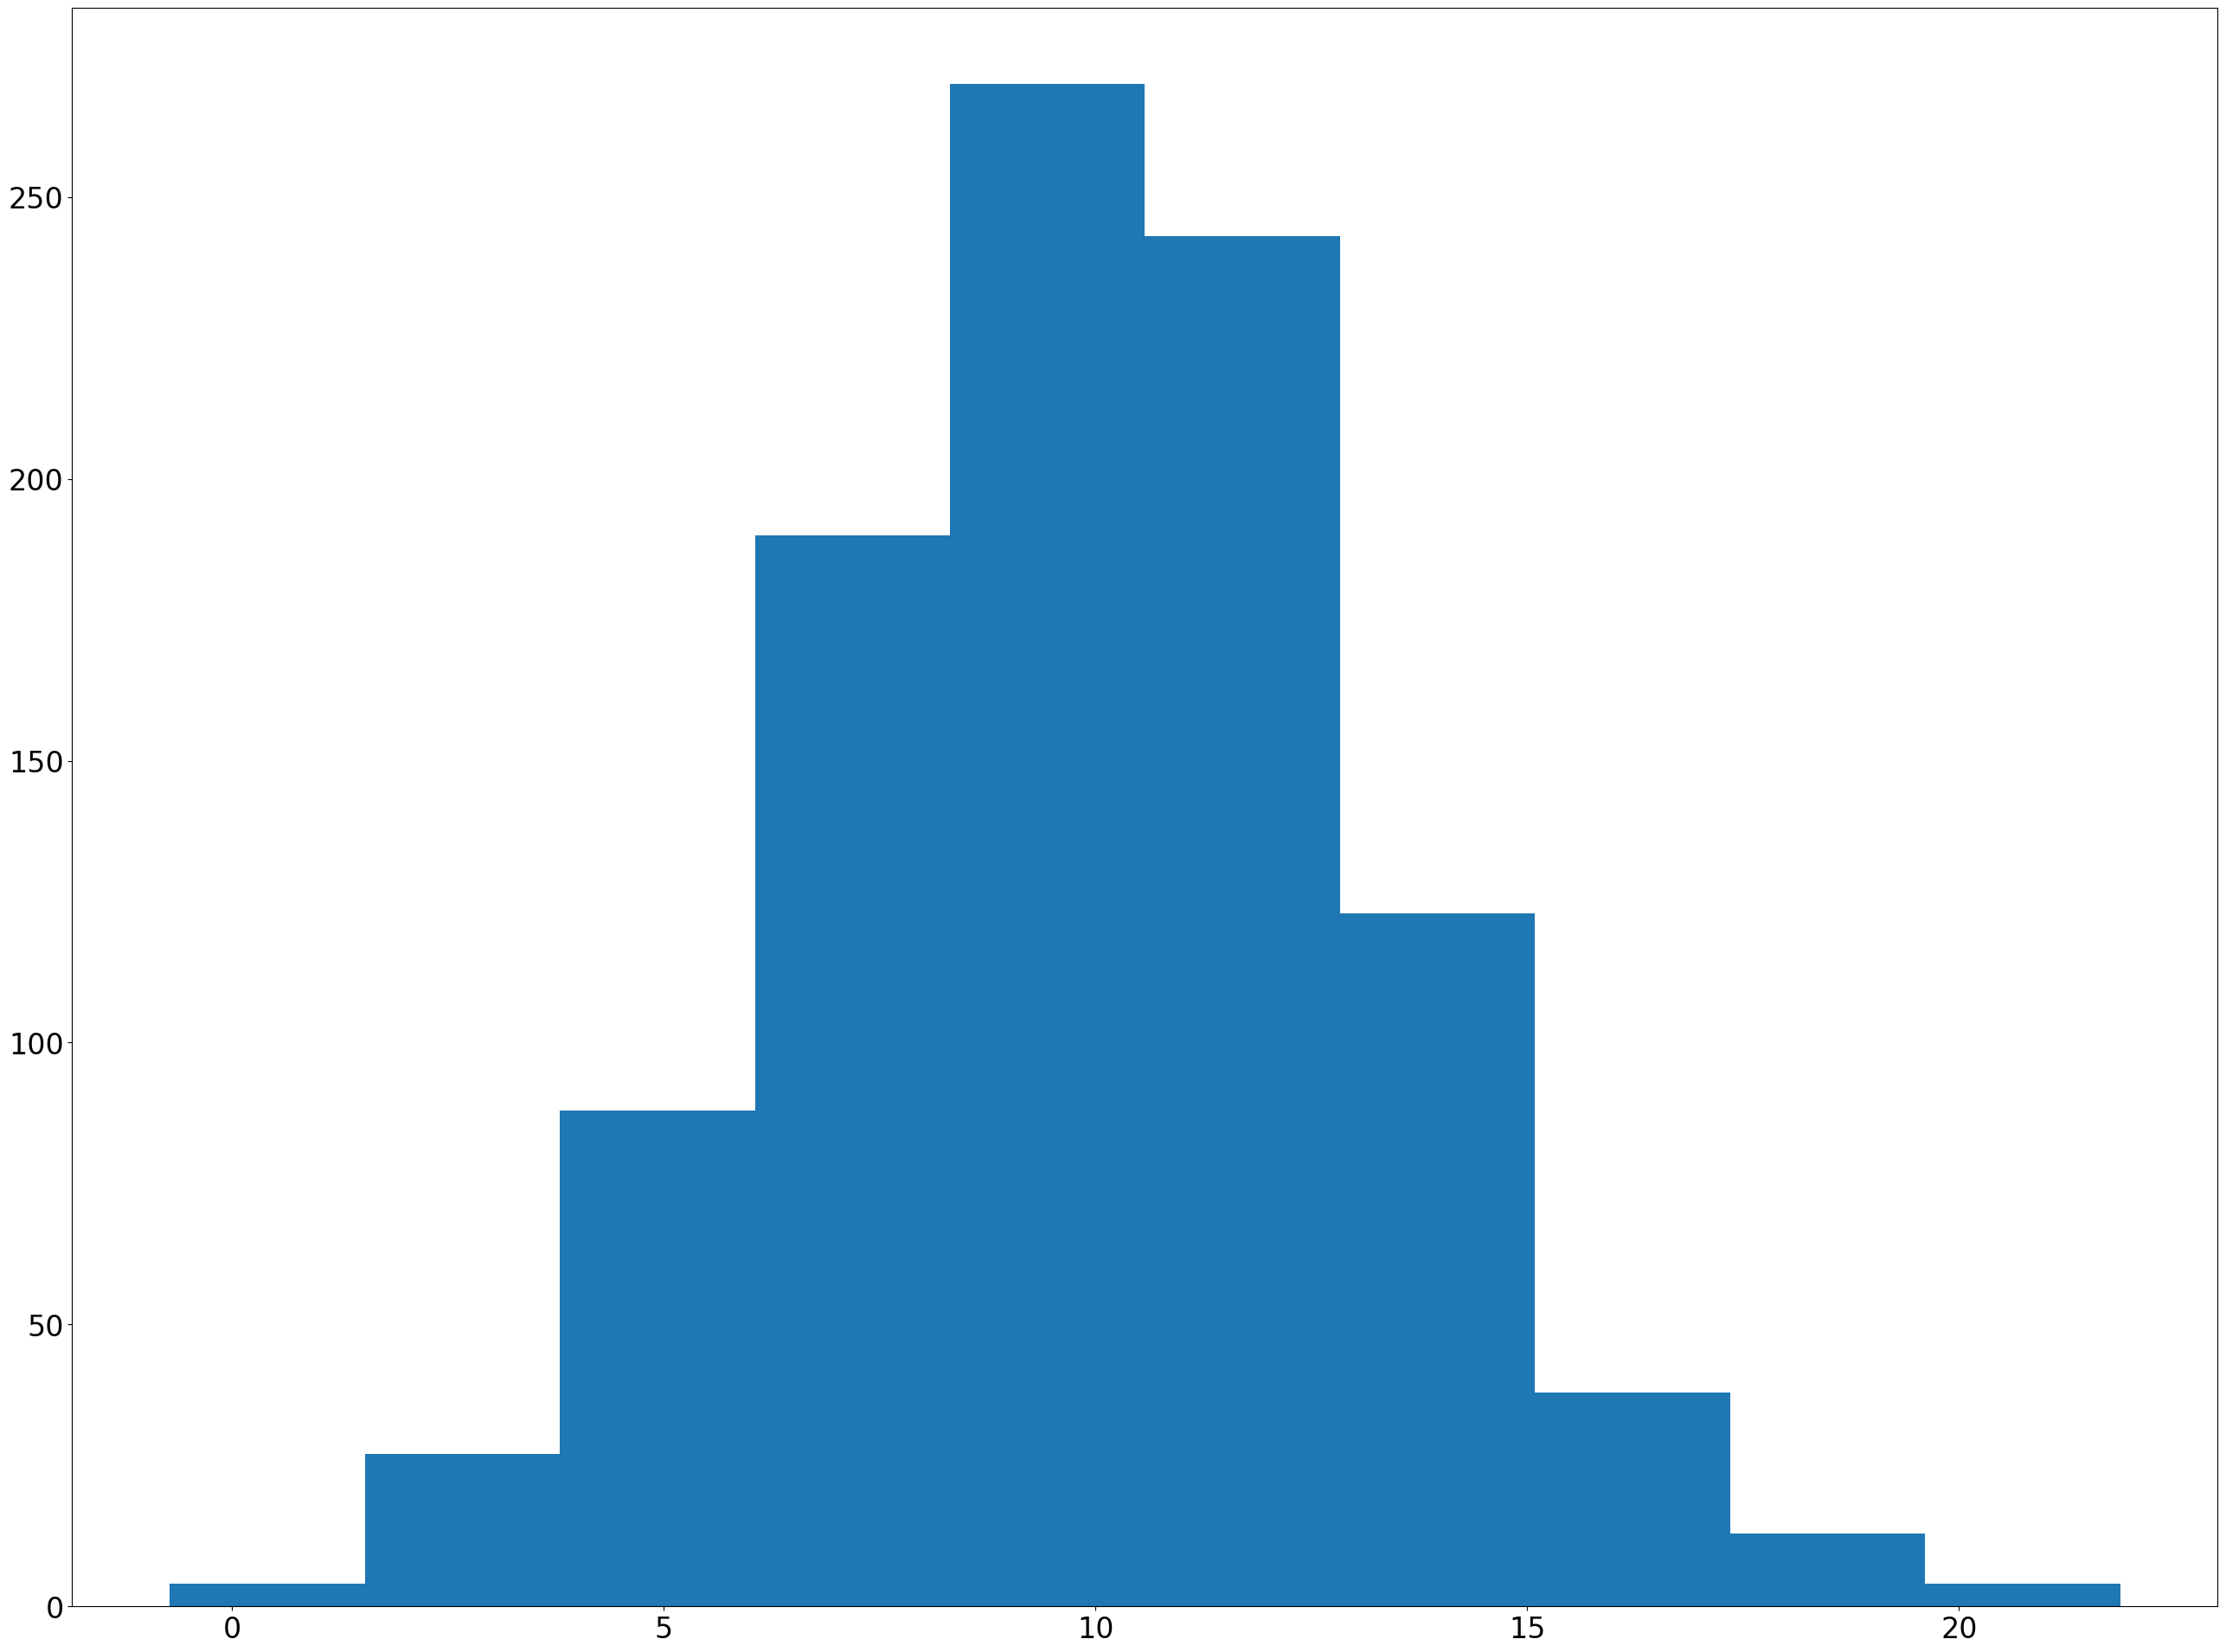

[  4.  27.  88. 190. 270. 243. 123.  38.  13.   4.]
[-0.71946   1.539286  3.798032  6.056778  8.315524 10.57427  12.833016
 15.091762 17.350508 19.609254 21.868   ]
<BarContainer object of 10 artists>


In [11]:
# write your code here
# # Compute and plot the histogram
# n, bins, patches = plt.hist(D[:, 0], bins=10, color='blue', alpha=0.7, edgecolor='black')

# # Customize the plot
# plt.xlabel("Values in Column 1")  # Label x-axis
# plt.ylabel("Frequency")  # Label y-axis
# plt.title("Histogram of Column 1")  # Title
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid to y-axis

# # Display the plot
# plt.show()

# # Print useful statistics
# print("Bin counts (n):", n)
# print("Bin edges (bins):", bins)

##CORRECT ANSWER##

n, bins, patches = plt.hist( D[:,0] )
plt.show()

print(n)
print(bins)
print(patches)

##CORRECT ANSWER##


### 7. Normal distribution

Generate a random sequence of 1000 numbers from the normal distribution $\mathcal{N}(0,1)$ using the NumPy command `np.random.randn`.  
Compute then and display the histogram of the sequence based on 100 bins between -5 and 5 using the command `plt.hist`.

Hint: `help(np.random.randn)` or look [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html).  
Hint: `help(plt.hist)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist).

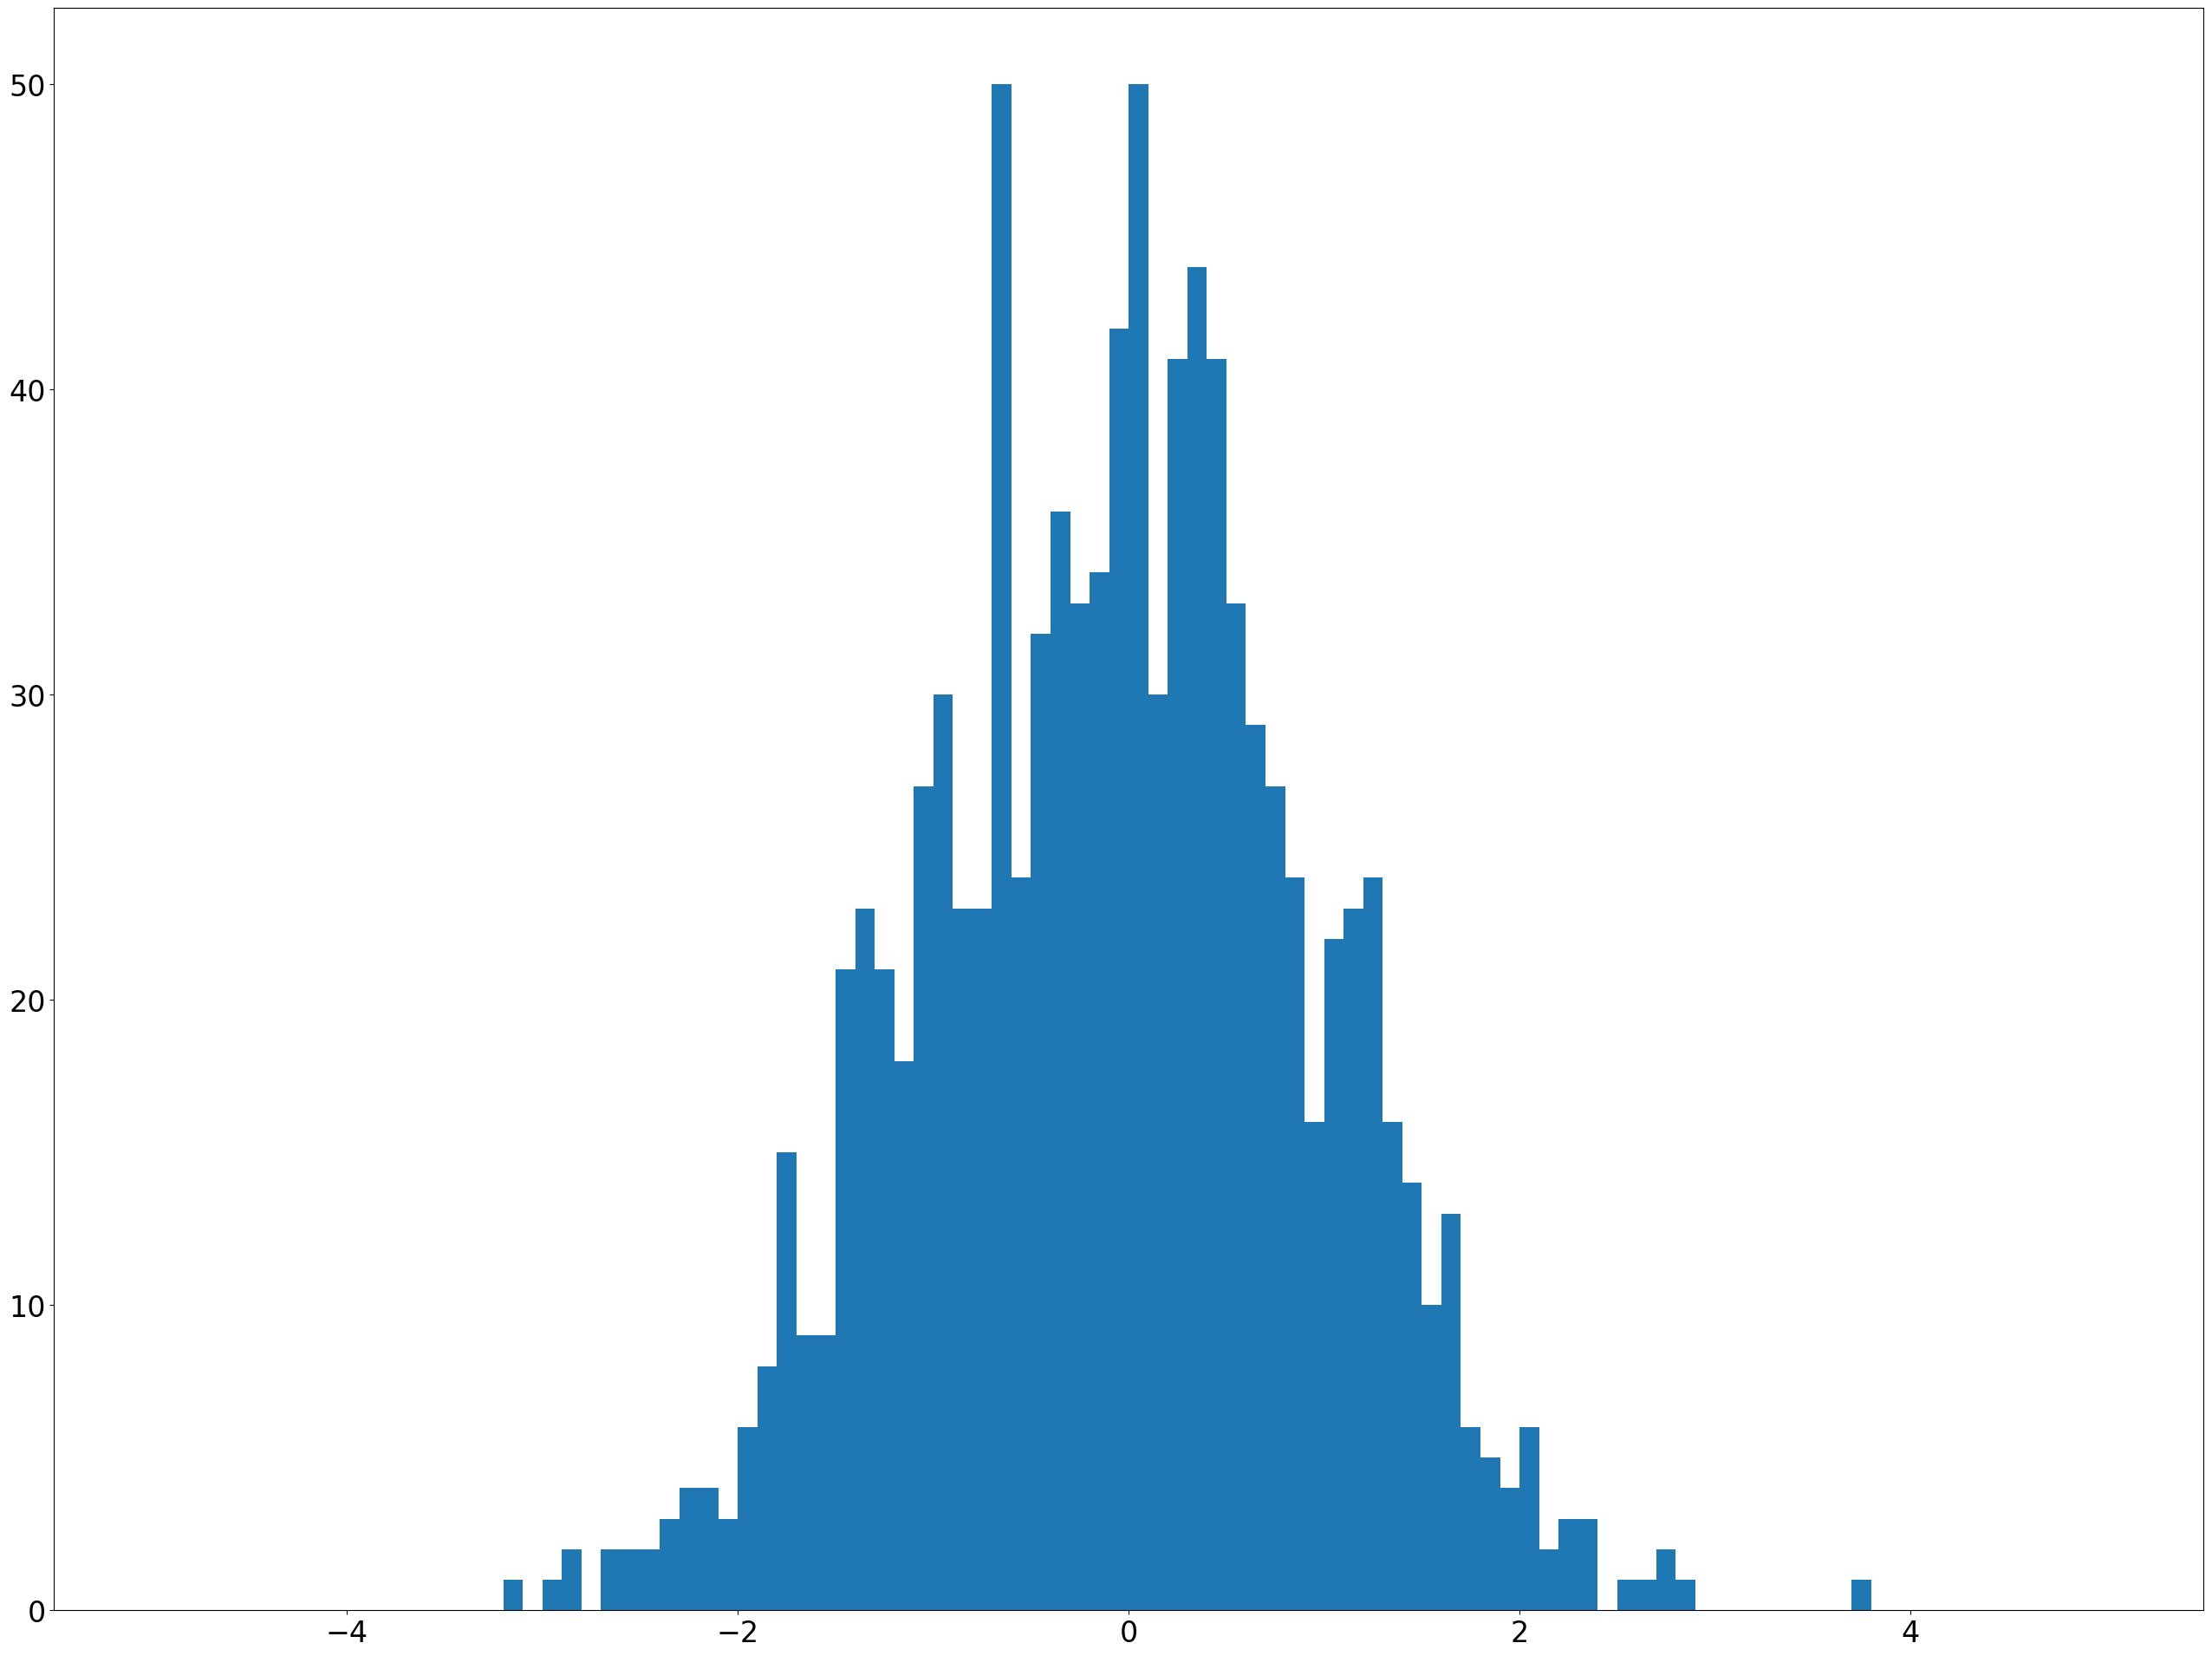

In [13]:
# write your code here
# # Step 1: Generate a random sequence of 1000 numbers from a normal distribution
# data = np.random.randn(1000)

# # Step 2: Compute and display the histogram with 100 bins between -5 and 5
# plt.hist(data, bins=100, range=(-5, 5), color='blue', alpha=0.7, edgecolor='black')

# # Step 3: Customize the plot
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram of Normally Distributed Data")
# plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid to y-axis

# # Step 4: Show the plot
# plt.show()


##CORRECT ANSWER##
s = 1 * np.random.randn(1000, 1) + 0

plt.hist(s, bins=100, range=(-5, 5))
plt.show()


### 8. Saving your data to a file

Save the generated sequence to a text file.

Tip: to save your data in a format readable by both NumPy and MATLAB pass the `delimiter=','` parameter to the appropriate NumPy method.

Hint: `help(np.savetxt)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html).

In [51]:
# write your code here

# # Step 2: Save the sequence to a text file
# np.savetxt('random_sequence.txt', data, delimiter=',', fmt='%.5f', header='Random Sequence Data')

# print("Data has been saved to 'random_sequence.txt'")


##CORRECT ANSWER##

# `delimiter=','` ensures that the data is readable by MATLAB
np.savetxt('my_random_sequence.dat', s, delimiter=',')

Data has been saved to 'random_sequence.txt'


### 9. Generating random data

Generate a random sequence of 100 numbers from a uniform distribution using the NumPy function `np.random.rand`.  
Compute and display the histogram, and appreciate the difference between the two distributions.

Hint: `help(np.random.rand)` or look [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html).  
Hint: `help(plt.hist)` or look [here](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist).

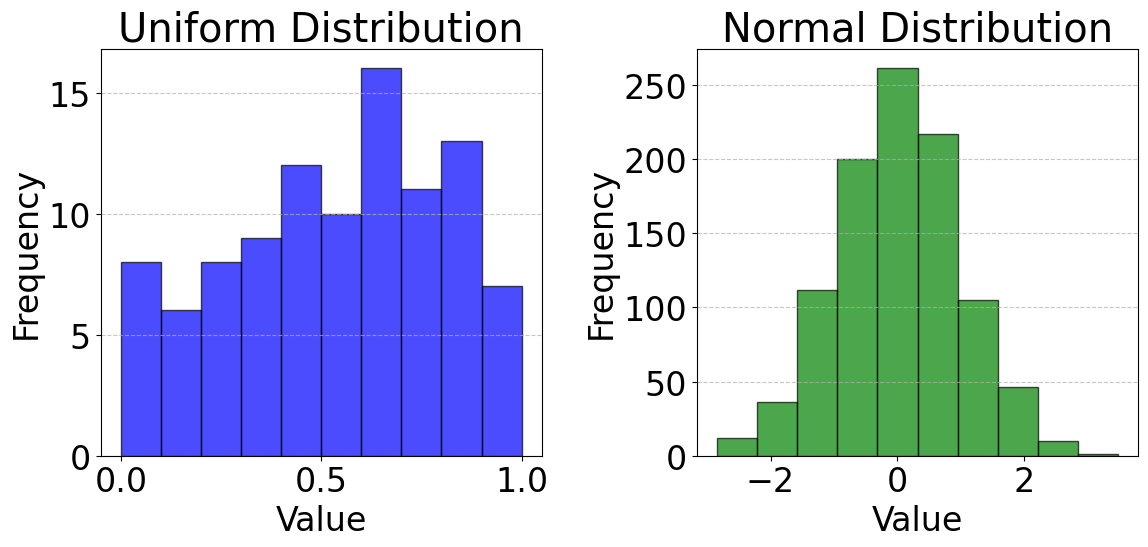

In [57]:
# write your code here
# Step 1: Generate a random sequence from a uniform distribution
uniform_data = np.random.rand(100) # Uniform distribution in the range [0, 1]

# Step 2: Generate a random sequence from a normal distribution
# normal_data = np.random.randn(100)  # Normal distribution with mean=0 and std=1
normal_data = data

# Step 3: Plot histograms for both distributions
plt.figure(figsize=(12, 6))

# Histogram for Uniform Distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=10, range=(0, 1), color='blue', alpha=0.7, edgecolor='black')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Normal Distribution
plt.subplot(1, 2, 2)
plt.hist(normal_data, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()